# Part I - (Ford GoBike System Data Exploration)
## by Okon Elizabeth Queen

## Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

###### Loading in the dataset


In [2]:
bikes=pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
bikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# checking the dimension of the dataset
bikes.shape

(183412, 16)

In [5]:
# checking the datatypes in the dataset
bikes.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [6]:
# Checking additional information about the dataset
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
# checking useful descriptive stastistics for the numerical columns in the dataset
bikes.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [8]:
bikes.duplicated().sum()

0

Here I decided to check for null values

In [9]:
# checking the sum of missing values in the dataset
bikes.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [10]:
percent_missing = bikes.isnull().sum() * 100 / len(bikes)

In [11]:
percent_missing

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.107408
start_station_name         0.107408
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.107408
end_station_name           0.107408
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          4.506248
member_gender              4.506248
bike_share_for_all_trip    0.000000
dtype: float64

### What is the structure of your dataset?

There are 183,412 bike in the dataset with 16 features

- duration_sec                  
- start_time                    
- end_time                      
- start_station_id            
- start_station_name          
- start_station_latitude        
- start_station_longitude       
- end_station_id              
- end_station_name            
- end_station_latitude          
- end_station_longitude         
- bike_id                       
- user_type                     
- member_birth_year          
- member_gender              
- bike_share_for_all_trip  

### What is/are the main feature(s) of interest in your dataset
I'm most interested in finding out the most popular start and stop station, the longest duration of a ride, what gender rides the most, etc.
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The main feature(s) of interest for me are `start_time`, `end_time`,`start_station_name`, `end_station_name`, `member_gender`, `bike_share_for_all_trip`, `member_birth_year`, and `user_type`.


## Cleaning Data

In [12]:
# Make copies of original piece of data before cleaning.
bikes_clean = bikes.copy()

### Define

1. Drop missing values using  pandas'`dropna()` function.

### Code

In [13]:
bikes_clean.dropna(inplace= True)

### Test

In [14]:
bikes_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

### Define

2. Change datatype for `start_time` and `end_time` to datetime using pandas' `to_datetime`

### Code

In [15]:
bikes_clean.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [16]:
bikes_clean['start_time'] = pd.to_datetime(bikes_clean['start_time'])
bikes_clean['end_time'] = pd.to_datetime(bikes_clean['end_time'])

I would like to have start time and end time in hours for easier analysis and visualizations.

In [17]:
bikes_clean['start_hour'] = bikes_clean['start_time'].dt.hour
bikes_clean['end_hour'] = bikes_clean['end_time'].dt.hour

In [18]:
bikes_clean['start_hour']

0         17
2         12
3         17
4         23
5         23
          ..
183407     0
183408     0
183409     0
183410     0
183411     0
Name: start_hour, Length: 174952, dtype: int64

In [19]:
bikes_clean['end_hour']

0         8
2         5
3         4
4         0
5         0
         ..
183407    0
183408    0
183409    0
183410    0
183411    0
Name: end_hour, Length: 174952, dtype: int64

### Test

In [20]:
bikes_clean['start_time']

0        2019-02-28 17:32:10.145
2        2019-02-28 12:13:13.218
3        2019-02-28 17:54:26.010
4        2019-02-28 23:54:18.549
5        2019-02-28 23:49:58.632
                   ...          
183407   2019-02-01 00:04:49.724
183408   2019-02-01 00:05:34.744
183409   2019-02-01 00:06:05.549
183410   2019-02-01 00:05:34.360
183411   2019-02-01 00:00:20.636
Name: start_time, Length: 174952, dtype: datetime64[ns]

In [21]:
bikes_clean['end_time']

0        2019-03-01 08:01:55.975
2        2019-03-01 05:24:08.146
3        2019-03-01 04:02:36.842
4        2019-03-01 00:20:44.074
5        2019-03-01 00:19:51.760
                   ...          
183407   2019-02-01 00:12:50.034
183408   2019-02-01 00:10:48.502
183409   2019-02-01 00:08:27.220
183410   2019-02-01 00:07:54.287
183411   2019-02-01 00:04:52.058
Name: end_time, Length: 174952, dtype: datetime64[ns]

In [22]:
bikes_clean['start_hour']

0         17
2         12
3         17
4         23
5         23
          ..
183407     0
183408     0
183409     0
183410     0
183411     0
Name: start_hour, Length: 174952, dtype: int64

In [23]:
bikes_clean['end_hour']

0         8
2         5
3         4
4         0
5         0
         ..
183407    0
183408    0
183409    0
183410    0
183411    0
Name: end_hour, Length: 174952, dtype: int64

### Define

3. I would like to create duration in minutes and hours

### Code

In [24]:
# Duration in seconds to duration in minutes
bikes_clean['duration_min'] = bikes_clean['duration_sec']/60
bikes_clean['duration_min'] = bikes_clean['duration_min'].astype(int)

# Duration in seconds to duration in hours
bikes_clean['duration_hour'] = bikes_clean['duration_sec']/3600
bikes_clean['duration_hour'] = bikes_clean['duration_hour'].astype(int)

### Test

In [25]:
bikes_clean['duration_min']

0          869
2         1030
3          608
4           26
5           29
          ... 
183407       8
183408       5
183409       2
183410       2
183411       4
Name: duration_min, Length: 174952, dtype: int32

In [26]:
bikes_clean['duration_hour']

0         14
2         17
3         10
4          0
5          0
          ..
183407     0
183408     0
183409     0
183410     0
183411     0
Name: duration_hour, Length: 174952, dtype: int32

In [27]:
bikes_clean

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,end_hour,duration_min,duration_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17,8,869,14
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,12,5,1030,17
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,17,4,608,10
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,23,0,26,0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,23,0,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,0,0,8,0
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,0,0,5,0
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,0,0,2,0
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,0,0,2,0


### Define

4. Change datatype for `member_birth_year`from float to integer using pandas' `astype`

### Code

In [28]:
bikes_clean['member_birth_year'] = bikes_clean['member_birth_year'].astype(int)

### Test

In [29]:
bikes_clean['member_birth_year']

0         1984
2         1972
3         1989
4         1974
5         1959
          ... 
183407    1996
183408    1984
183409    1990
183410    1988
183411    1989
Name: member_birth_year, Length: 174952, dtype: int32

### Define

5. I would like to get the age of the members from `member_birth_year`

### Code

In [30]:
# To get their present age i have to minus 2022 from thier year of birth
bikes_clean['age'] = 2022 - bikes_clean['member_birth_year']
bikes_clean['age'] = bikes_clean['age'].astype(int)

## Test

Checking if the code worked

In [31]:
bikes_clean['age']

0         38
2         50
3         33
4         48
5         63
          ..
183407    26
183408    38
183409    32
183410    34
183411    33
Name: age, Length: 174952, dtype: int32

### Define

6. I think some columns are irrelevant to the analysis and i would like to drop them

#### Code

In [32]:
bikes_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_hour', 'end_hour', 'duration_min', 'duration_hour', 'age'],
      dtype='object')

In [33]:
bikes_clean.drop(['start_station_id','start_station_latitude', 'start_station_longitude', 'end_station_id','end_station_latitude', 'end_station_longitude','bike_id'], axis = 1, inplace = True)

### Test

In [34]:
bikes_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_name',
       'end_station_name', 'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip', 'start_hour', 'end_hour', 'duration_min',
       'duration_hour', 'age'],
      dtype='object')

In [35]:
bikes_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   end_station_name         174952 non-null  object        
 5   user_type                174952 non-null  object        
 6   member_birth_year        174952 non-null  int32         
 7   member_gender            174952 non-null  object        
 8   bike_share_for_all_trip  174952 non-null  object        
 9   start_hour               174952 non-null  int64         
 10  end_hour                 174952 non-null  int64         
 11  duration_min             174952 non-null  int32         
 12  duration_hour   

In [36]:
bikes_clean.to_csv('bikes_clean.csv')

###### Now the data can be visualized

## Univariate Exploration


### Question 1
Distribution of the members age.

### Visualisation

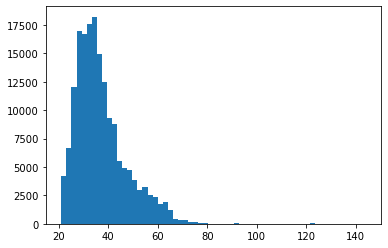

In [37]:
# Since it is a quantitative variable a histogram will appropriate
#bins = np.arange(0, bikes_clean['age'].max()+5 ,5)
plt.hist(bikes_clean.age, bins= 60);

### Observation

The histogram shows that distribution is right-skewed and unimodal and most ages fall between 20 and 40. Also it looks like there are some outliers that need to be take care of.

<AxesSubplot:xlabel='age'>

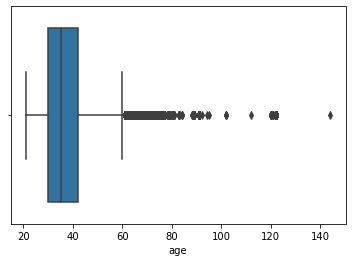

In [38]:
sns.boxplot(data=bikes_clean, x='age')

In [39]:
# Creating a fuction that produces outliers ranges
def outlier(x):
    
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)

    IQR_num = Q3 - Q1
    IQR_mult_num = IQR_num*1.5

    lower_num = Q1 - IQR_mult_num
    upper_num = Q3 + IQR_mult_num
    return lower_num, upper_num

In [40]:
# Checking the outlier range of EDUC column
outlier(bikes_clean.age)

(12.0, 60.0)

It appears there are outliers and they need to be taken care of. I'll replace them with the average age

In [41]:
bikes_clean.age.mean()

37.196865425945404

In [42]:
for age in bikes_clean.age:
    if age > 60:
        bikes_clean.age = bikes_clean.age.replace(age,bikes_clean.age.mean())

In [43]:
bikes_clean.age.describe()

count    174952.000000
mean         36.205509
std           8.377033
min          21.000000
25%          30.000000
50%          35.000000
75%          41.000000
max          60.000000
Name: age, dtype: float64

In [44]:
bikes_clean['age'] = bikes_clean['age'].astype(int)

The maximum age for my analysis is 60

### Question 2
Explore the member_gender

### Visualisation

In [45]:
#Create a vertical bar chart using Seaborn, with a uniform single color
base_color = sns.color_palette()[0]

In [46]:
def countplot(x,title,xlabel,ylabel):
    """This is a function that plots a barchart"""
    base_color = sns.color_palette()[0]
    sns.countplot(data= bikes_clean,x=x, color = base_color)
    title=title
    
    
    plt.show();

In [47]:
def countplot_order(x, order,title,xlabel,ylabel):
    """This is a function that plots a barchart"""
    base_color = sns.color_palette()[0]
    sns.countplot(data= bikes_clean,x=x, color = base_color, order=order)
    title=title

    
    
    plt.show();

In [48]:
#Create a vertical bar chart using Seaborn, with a uniform single color
base_color = sns.color_palette()[0]

In [49]:
# sort the member gender in order of increasing frequency
gender=bikes_clean.member_gender.value_counts().index

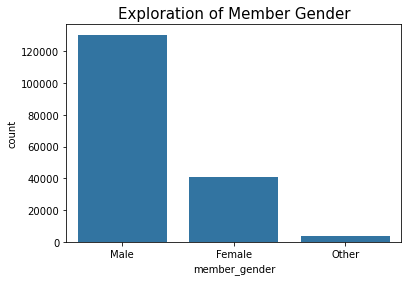

In [50]:
countplot_order('member_gender',gender,plt.title('Exploration of Member Gender', fontsize = 15), plt.xlabel('Gender', fontsize = 10),plt.ylabel('Gender Counts', fontsize = 10))

### Observation

It appears that there are more male riders than female riders and I think this is due to sampling bias.

### Question 3

Explore the user type

### Visualisation

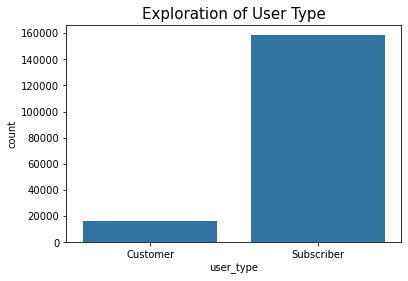

In [51]:
countplot('user_type',plt.title('Exploration of User Type', fontsize = 15), plt.xlabel('User Type', fontsize = 10), plt.ylabel('User Type Counts', fontsize = 10))

### Observation

The visualisation above shows that most users are Subscribers

### Question 4

Explore bike_share_for_all_trip

### Visualisation

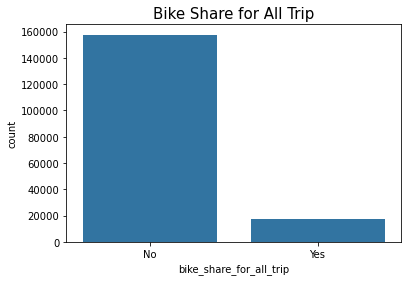

In [52]:
countplot('bike_share_for_all_trip', plt.title('Bike Share for All Trip', fontsize = 15),plt.xlabel('Bike Share for Trips', fontsize = 10),  plt.ylabel('Bike Share Counts', fontsize = 10))

### Observation

The countplot above shows that most users did not share their rides.

### Question 5

Top 10 Start Station

### Visualisation

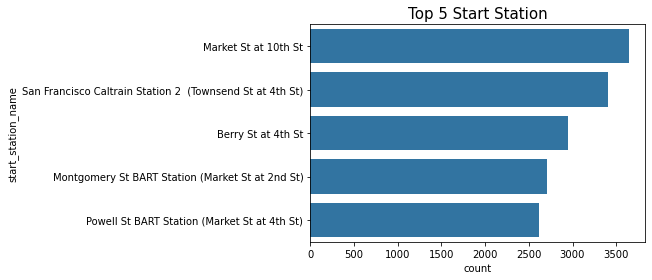

In [53]:
plt.ylabel('Name of Start Station', fontsize = 10)
plt.title('Top 5 Start Station', fontsize = 15);
type_order = bikes_clean.start_station_name.value_counts().head(5).index
sns.countplot(data=bikes_clean, y= bikes_clean.start_station_name, order=type_order,color=base_color);

### Observation

It appears that Market St at 10th St is the most popular start station in the greater San Francisco Bay area followed closely by San Francisco Caltrain Station 2.

### Question 6

Top 10 End Station

### Visualisation

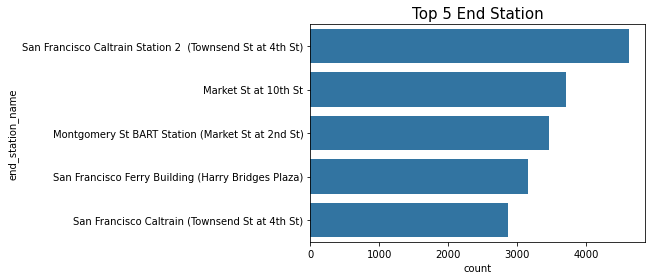

In [54]:
plt.ylabel('Name of End Station', fontsize = 10)
plt.title('Top 5 End Station', fontsize = 15);
type_order = bikes_clean.end_station_name.value_counts().head(5).index
sns.countplot(data=bikes_clean, y= bikes_clean.end_station_name, order=type_order,color=base_color);

### Observation

Suprisingly San Francisco Caltrain Station 2 is the most popular end station in the greater San Francisco Bay area followed closely by Market St at 10th St.

### Question 7

Explore Start Hours and End hours

### Visualisation

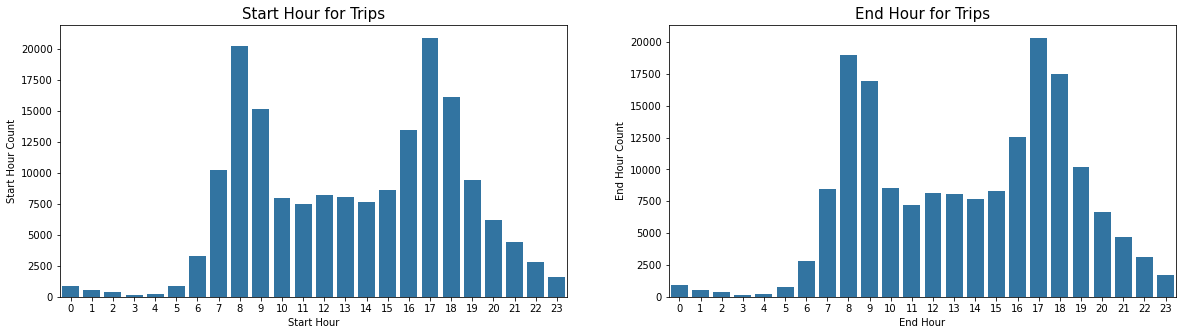

In [55]:
plt.figure(figsize = [20, 5]) 
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
sns.countplot(data=bikes_clean, x='start_hour' , color=base_color);
plt.xlabel('Start Hour', fontsize = 10)
plt.ylabel('Start Hour Count', fontsize = 10)
plt.title('Start Hour for Trips', fontsize = 15);

plt.subplot(1, 2,2 )
 # 1 row, 2 cols, subplot 2
sns.countplot(data=bikes_clean, x='end_hour' , color=base_color);
plt.xlabel('End Hour', fontsize = 10)
plt.ylabel('End Hour Count', fontsize = 10)
plt.title('End Hour for Trips', fontsize = 15);

### Observation

The above plot is bimodal with 2 peaks at 8 am and 5 pm showing that the most common periods of the day when trips start are 7-9 am and 4-6 pm. Same fot the end hour.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The histogram for age shows that distribution is right-skewed and unimodal and most ages fall between 35 and 40. Also there were some outliers that I took care of.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I converted `member_birth_year` by substracting the year from current year so this gives us a distibution for age, this action is performed as age gives a better better perception regarding trip duration dependency.

> Most users are 20-40 years old.

> Most users are subscribers, males and didn't share the bike for all trip.

## Bivariate Exploration


## Question 8

Relationship between age and duration of trips

### Visualisation

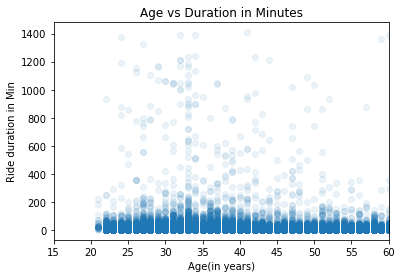

In [56]:
plt.scatter(x = bikes_clean['age'], y = bikes_clean['duration_min'], alpha = 1/12)
plt.xlabel('Age(in years)')
plt.ylabel ('Ride duration in Min')
plt.xlim((15,60))
plt.title('Age vs Duration in Minutes');

### Observation

The above scatter plot shows a weak negative relationship between the duration and the age. The older the user, the shorter the duration of the trip.

### Question 9

Relationship between gender and Start hour of trips

### Visualisation

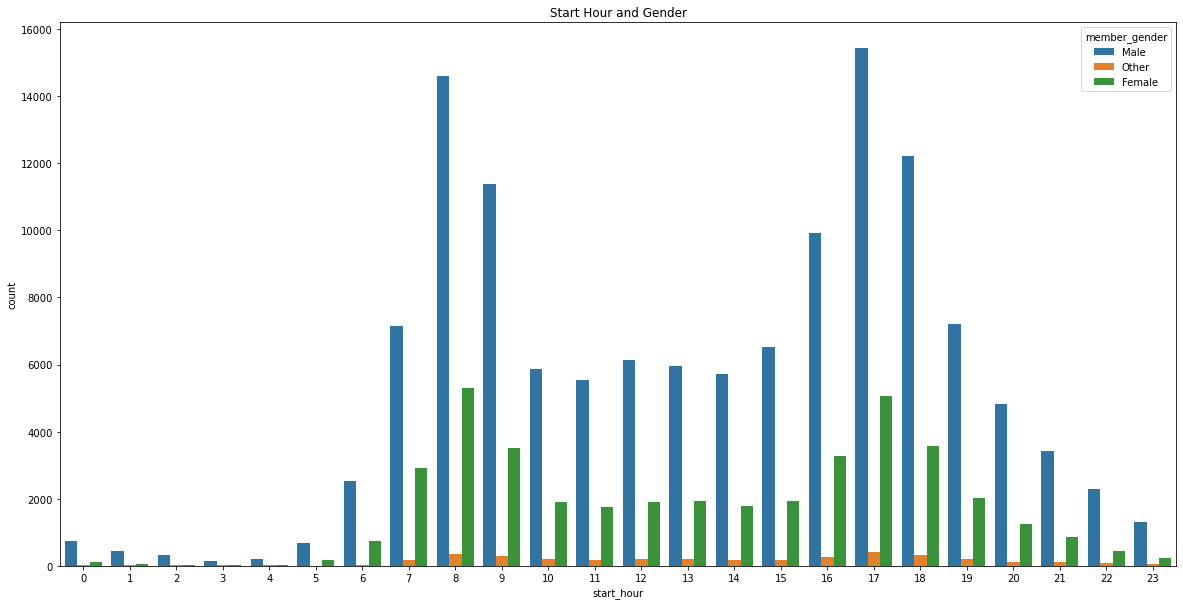

In [57]:
#cluster bar chart
plt.figure(figsize = [20, 10])
sns.countplot(data = bikes_clean, x = "start_hour", hue = "member_gender")
plt.title('Start Hour and Gender');

### Observation

The plot above is bimodal and it shows that most male and female start the trip around 7-9am and 4-6pm 

## Question 10

Relationship between user type and duration of trip

### Visualisation

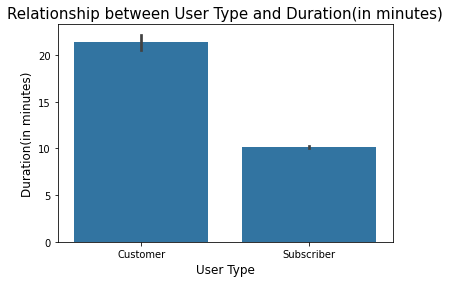

In [58]:
sns.barplot(data=bikes_clean, x='user_type', y='duration_min', color= base_color);
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Duration(in minutes)', fontsize = 12)
plt.title('Relationship between User Type and Duration(in minutes)', fontsize = 15);

### Observation

The bar plot aboves shows that Customers ride for a longer period than Subscribers even though most of the users are subscribers

### Question 11

Relationship between gender and shared bike trips.

### Visualisation

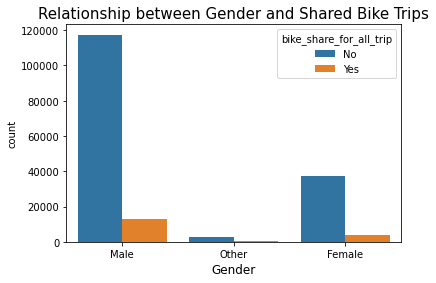

In [59]:
sns.countplot(data = bikes_clean, x = 'member_gender', hue = 'bike_share_for_all_trip');
plt.xlabel('Gender', fontsize=12)
plt.title('Relationship between Gender and Shared Bike Trips', fontsize = 15);

### Observation

The visualisation above suggests that Males share their trips than Females and I think this could be sampling bias.

### Visualisation

### Question 12

Relationship between user type and shared bike trips

### Visualisation

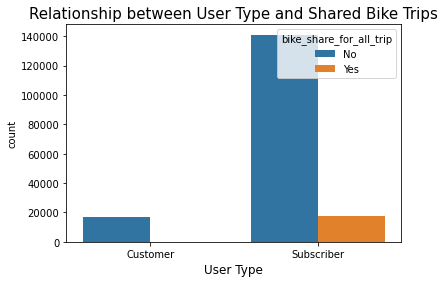

In [60]:
sns.countplot(data = bikes_clean, x = 'user_type', hue = 'bike_share_for_all_trip');
plt.xlabel('User Type', fontsize=12)
plt.title('Relationship between User Type and Shared Bike Trips', fontsize = 15);

### Observation

The clustered bar chart above shows that Subscribers share their trips and Customers don't.

### Question 13

Relationship between gender and duration of trip

### Visualisation

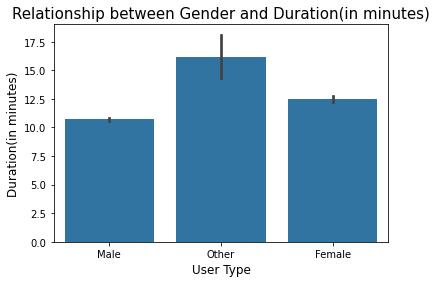

In [61]:
sns.barplot(data=bikes_clean, x='member_gender', y='duration_min', color= base_color);
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Duration(in minutes)', fontsize = 12)
plt.title('Relationship between Gender and Duration(in minutes)', fontsize = 15);

### Obseravation

Suprisingly other and female ride for a long period than males even though the quantity of males riders is higher than female and other riders.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Trip Duration is dependent on the age of the member(the younger the user, the longer the trip)

> Customers have longer trips than Subscribers.

>Females have longer trips than males.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Subscribers share their trips and Customers don't.

> Males share their trips than Females.

## Multivariate Exploration


### Question 14

Relationship between age,gender and duration of trips.

### Visualisation

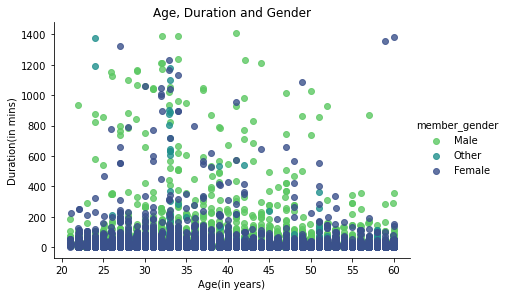

In [62]:
g = sns.FacetGrid(data = bikes_clean, hue = 'member_gender',height = 4, aspect = 1.5, palette = 'viridis_r')
g = g.map(sns.regplot, 'age', 'duration_min',x_jitter= 0.04, fit_reg = False);
g.add_legend()
plt.title('Age, Duration and Gender')
plt.xlabel('Age(in years)')
plt.ylabel('Duration(in mins)');

### Observation

Gender doesn't have any effect with age and duration of trips.

### Question 15

Relationship between age,gender and shared bike trips.

### Visualisation

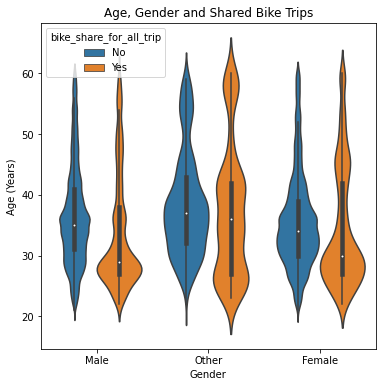

In [63]:
plt.figure(figsize=[6,6])
sns.violinplot(data=bikes_clean,x='member_gender',y='age',hue='bike_share_for_all_trip')
plt.xlabel('Gender')
plt.ylabel('Age (Years)')
plt.title('Age, Gender and Shared Bike Trips');

### Observation

Young riders shared their trips the most for all genders.

### Question 16

Relationship between duration of trip,gender and shared bike trips.

### Visualisation

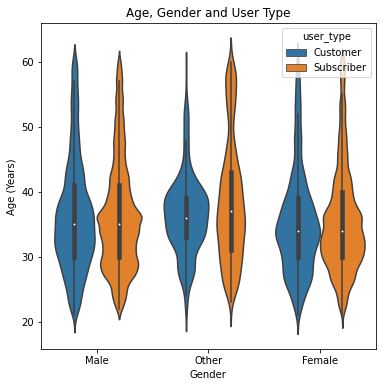

In [64]:
plt.figure(figsize=[6,6])
sns.violinplot(data=bikes_clean,x='member_gender',y='age',hue='user_type')
plt.xlabel('Gender')
plt.ylabel('Age (Years)')
plt.title('Age, Gender and User Type');

### Observation

The user type doesn't have any effect on age and gender.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Most shared trips were done by young riders across all genders

### Were there any interesting or surprising interactions between features?

> It doesn't seem like there's a systematic interaction effect between age, gender and user type.

## Conclusions
> While exploring and analysing the Ford GoBike System dataset, I loaded the data using pandas and going through the dataset, there were some missing values and they were taken care of. I removed some columns in the dataset that will not help in the analysis.

The analysis helped me discover :
- Gender: From the dataset there were more males than females.

- Most users are Subscribers

- Most users did not share their rides.

- Market St at 10th St is the most popular start station in the greater San Francisco Bay area.

- San Francisco Caltrain Station 2 is the most popular end station in the greater San Francisco Bay area

-  Customers ride for a longer period than Subscribers

- The older the user, the shorter the duration of the trip.

## Limitation(s):
(1) Sampling Bias: there were more males than females in the dataset.